In [4]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 3.1 MB/s eta 0:00:00


In [6]:
#Mai multa teorie de la lectia trecuta
#Aplicam metoda one vs rest la un data set de clasificare cu 3 clase simplul
#Folosim un dataset 2D unde fiecare clasa este data prin esantionaee de date ddintr-o distributie gaussiana
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

In [10]:
#Antrenam LinearSVC pe dataset
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)
print("Coeficient shape: ",linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coeficient shape:  (3, 2)
Intercept shape:  (3,)


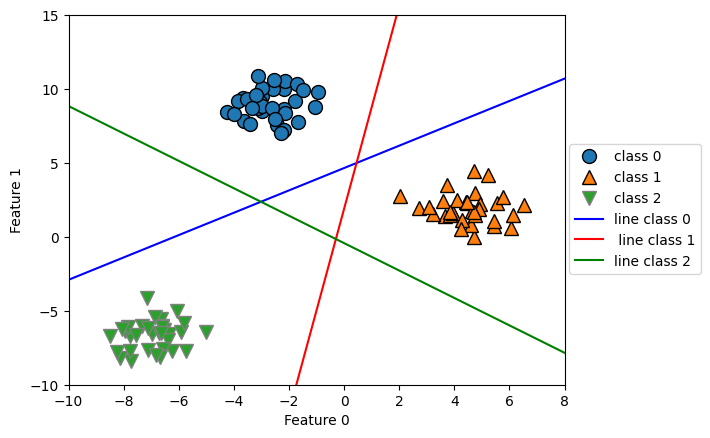

In [16]:
#Vizulizarea linilor date prin clasificarile binare
import numpy as np
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef , intercept , color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
  plt.plot(line,-(line*coef[0]+intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['class 0 ', 'class 1', 'class 2', 'line class 0',' line class 1','line class 2'],loc=(1.01,0.3))

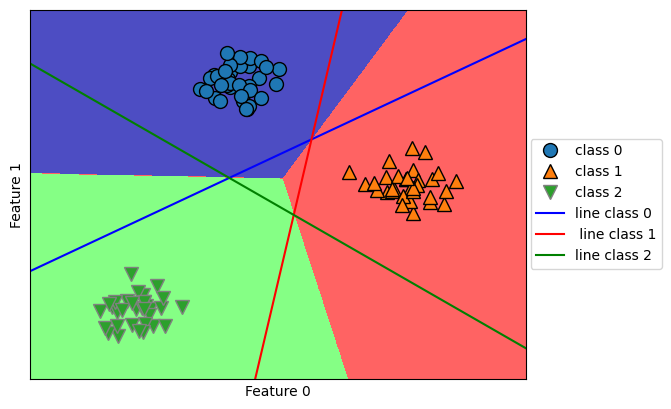

In [21]:
#Predictia pentru toate regiunile din spatiu 2D
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef , intercept , color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
  plt.plot(line,-(line*coef[0]+intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['class 0 ', 'class 1', 'class 2', 'line class 0',' line class 1','line class 2'],loc=(1.01,0.3))

In [25]:
#Cum obtinem vectorii de prezicere
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
logreg=LogisticRegression().fit(X_train,y_train)
logreg=LogisticRegression()
y_pred=logreg.fit(X_train,y_train).predict(X_test)
#sau
y_pred=LogisticRegression().fit(X_train,y_train).predict(X_test)

array([0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 0])

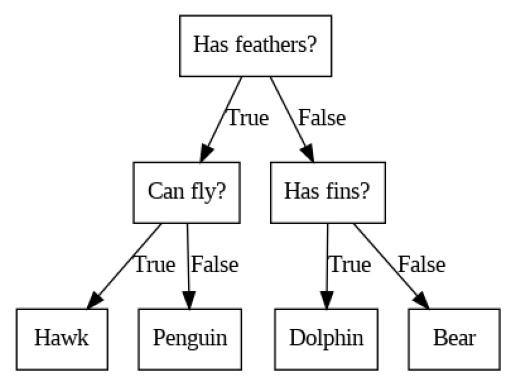

In [26]:
#Arbori de decizie
mglearn.plots.plot_animal_tree()

In [75]:
#Constructie arbore decizie
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
Tree=DecisionTreeClassifier(random_state=0)
Tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(Tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [49]:
Tree4=DecisionTreeClassifier(max_depth=4,random_state=0)  #Max_depth=4 limiteaza arborele la 4 intrebari
Tree4.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(Tree4.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Tree4.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


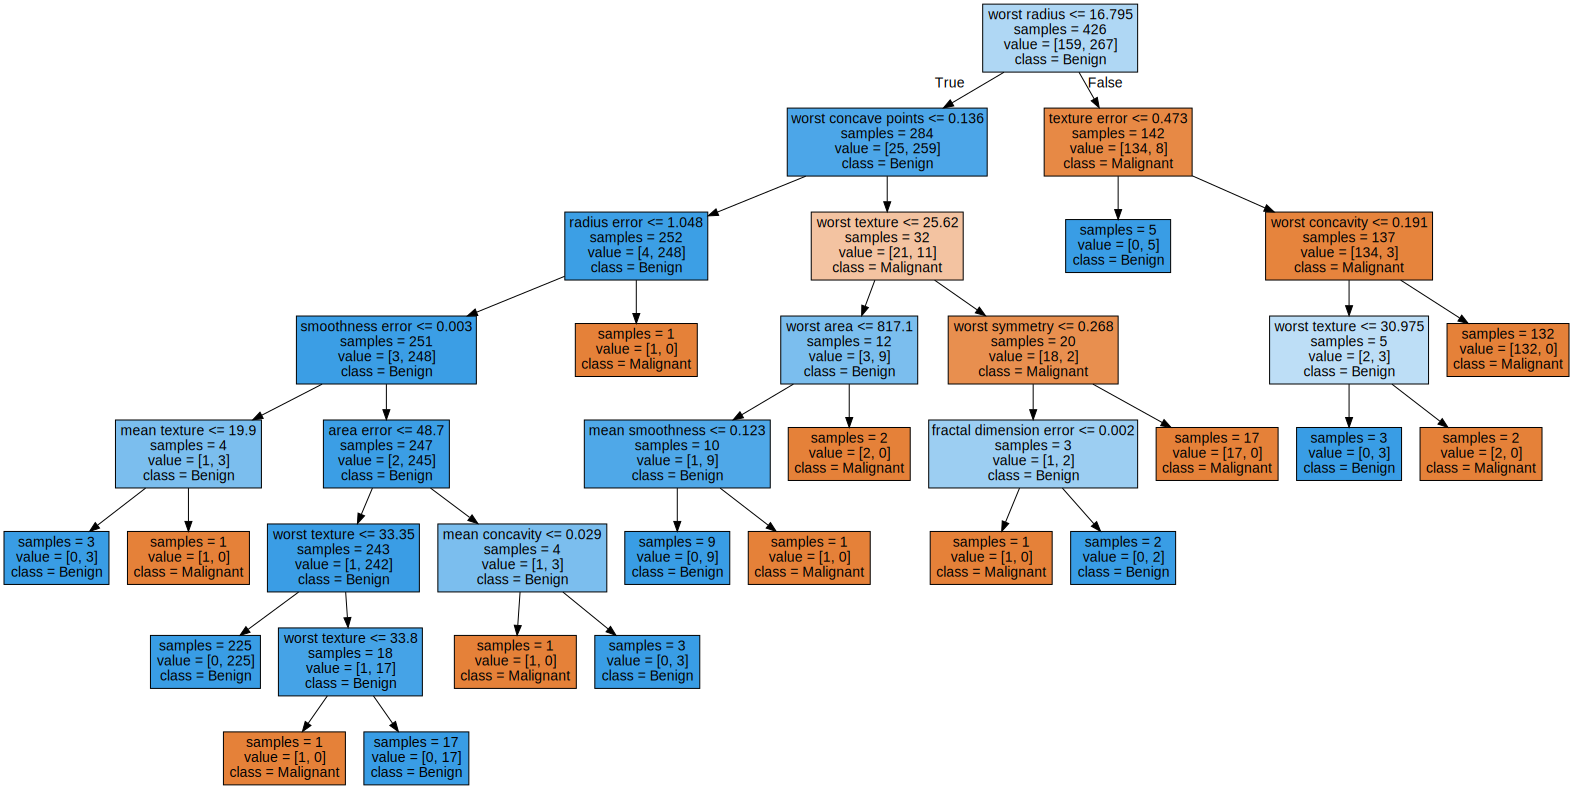

In [76]:
from sklearn.tree import export_graphviz
export_graphviz(Tree,out_file="Tree.dot",class_names=["Malignant","Benign"],feature_names=cancer.feature_names,impurity=False,filled=True)
import graphviz
with open("Tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)